In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./daily_data.csv")

In [4]:
data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   float64
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   float64
 13  gust_kph                  2893 non-null   float64
 14  air_qual

In [6]:
data.describe()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,22.024577,10.304805,158.994469,1013.745938,0.165299,74.773591,32.073280,23.725752,9.745524,2.216730,16.930522,1.599032
std,6.615540,7.264472,103.021634,6.172045,0.937061,19.335724,32.584184,8.877424,2.489918,2.238163,10.541449,1.062513
min,-2.000000,3.600000,1.000000,982.000000,0.000000,4.000000,0.000000,-4.300000,0.000000,1.000000,0.700000,1.000000
25%,17.000000,5.000000,70.000000,1010.000000,0.000000,66.000000,0.000000,17.000000,10.000000,1.000000,9.000000,1.000000
50%,22.000000,8.300000,150.000000,1014.000000,0.000000,78.000000,25.000000,24.500000,10.000000,1.000000,15.100000,1.000000
75%,27.000000,13.000000,236.000000,1018.000000,0.000000,89.000000,68.000000,30.000000,10.000000,1.000000,22.300000,2.000000
max,45.000000,74.200000,360.000000,1036.000000,28.700000,100.000000,100.000000,73.600000,32.000000,10.000000,75.600000,6.000000


In [7]:
data.dtypes

day_id                       object
city_id                      object
temperature_celsius         float64
condition_text               object
wind_kph                    float64
wind_degree                   int64
pressure_mb                 float64
precip_mm                   float64
humidity                      int64
cloud                         int64
feels_like_celsius          float64
visibility_km               float64
uv_index                    float64
gust_kph                    float64
air_quality_us-epa-index      int64
sunrise                      object
sunset                       object
dtype: object

In [8]:
data.isnull().sum()

day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
dtype: int64

In [9]:
data['condition_text'].value_counts()

Clear and Sunny            122
Partly Cloudy              122
Light Precipitation         68
Cloudy and Overcast         53
Mist or Fog                 50
Rain Showers                21
Light Rain with Thunder     16
Thunderstorms               15
Moderate to Heavy Rain      12
Name: condition_text, dtype: int64

In [10]:
data = data.dropna(subset=['condition_text'])

In [11]:
label_encoder = LabelEncoder()
data['condition_text_encoded'] = label_encoder.fit_transform(data['condition_text'])

In [12]:
data['sunrise'] = pd.to_datetime(data['sunrise'], format='%I:%M %p').dt.hour
data['sunset'] = pd.to_datetime(data['sunset'], format='%I:%M %p').dt.hour


In [13]:
features = ['temperature_celsius', 'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 
            'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 
            'gust_kph', 'air_quality_us-epa-index', 'sunrise', 'sunset']
X = data[features]
y = data['condition_text_encoded']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test_scaled)


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 71.88%


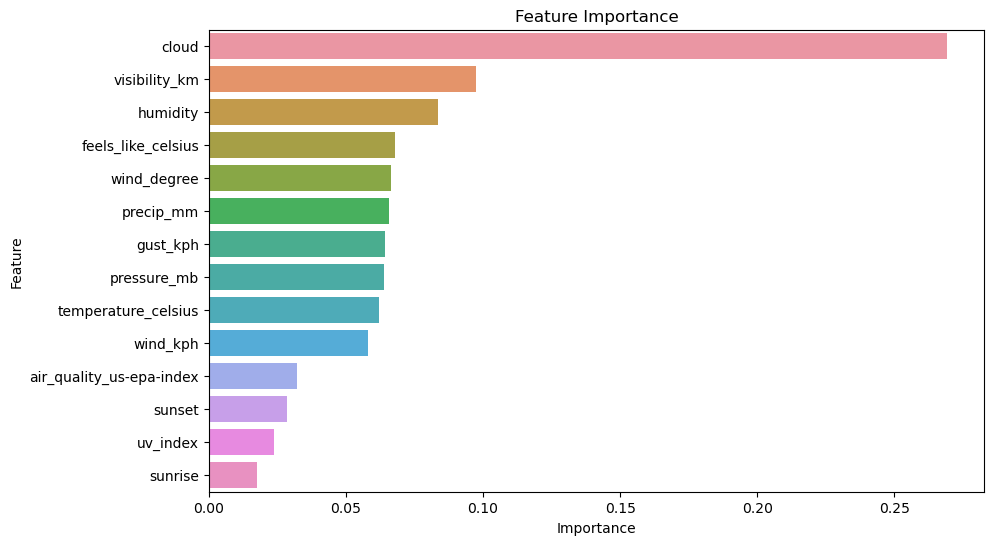

In [19]:
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [21]:
submission = pd.DataFrame({
    'day_id': data['day_id'],
    'condition_text': label_encoder.inverse_transform(model.predict(scaler.transform(X)))
})


In [23]:
submission.to_csv('submission.csv', index=False)